# 05-1 결정 트리

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

# 데이터 불러오기
iris = datasets.load_iris()

data = iris['data'] # 입력(input)
target = iris['target'] # 타깃(target)

# 데이터 확인하기
df = pd.DataFrame(data=data, columns=iris.feature_names)
df['target_label']=target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# 데이터 기본 정보 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target_label       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [3]:
# 데이터 통계 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target_label       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
# 데이터 특성 표준화
data = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy()
target = df['target_label'].to_numpy()

# 훈련 세트와 테스트 세트 나누기
# 테스트 세트의 비율은 0.2
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.2, random_state=42)

In [6]:
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


In [7]:
# 데이터 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [8]:
from sklearn.tree import DecisionTreeClassifier

# 결정 트리 모델 훈련
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, y_train)

print(dt.score(train_scaled, y_train), dt.score(test_scaled, y_test))

1.0 1.0


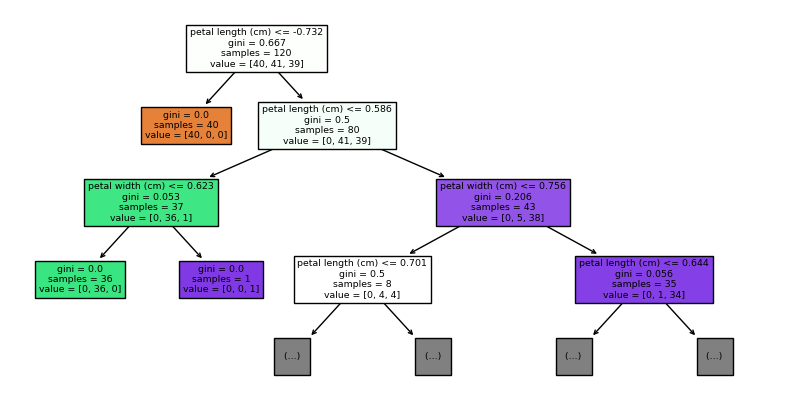

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 사이즈 10:5 비율로 설정
plt.figure(figsize=(10,5))

# 결정 트리 모델 객체 전달
# 최대 깊이 3으로 설정
# 특성의 이름을 전달
plot_tree(dt, max_depth = 3, filled=True, feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
plt.show()

In [10]:
# 결정 트리 모델 최대 깊이=3 지정해서 훈련
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

# 표준화 된 데이터 전달
dt.fit(train_scaled, y_train)

# 훈련 세트와 테스트 세트 점수 출력
print(dt.score(train_scaled, y_train), dt.score(test_scaled, y_test))

0.9583333333333334 1.0


In [12]:
print(dt.feature_importances_)

[0.         0.         0.93462632 0.06537368]


In [13]:
# 결정 트리 모델 최대 깊이=3 지정해서 훈련
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

# 표준화 되지 않은 데이터로 훈련
dt.fit(X_train, y_train)

# 훈련 세트와 테스트 세트 점수 출력
print(dt.score(X_train, y_train), dt.score(X_test, y_test))

0.9583333333333334 1.0


In [14]:
print(dt.feature_importances_)

[0.         0.         0.93462632 0.06537368]


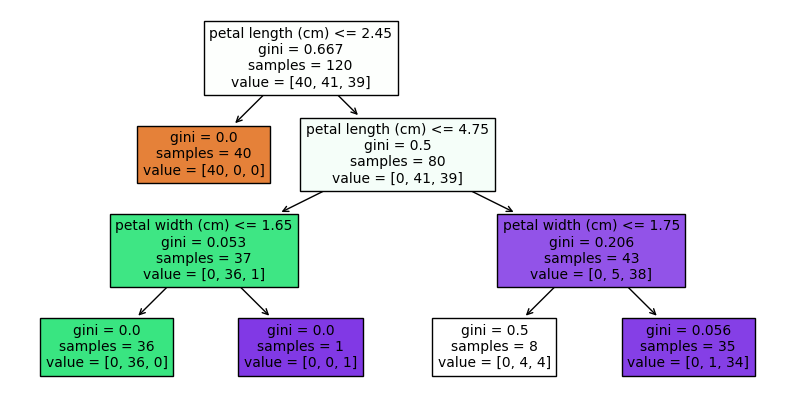

In [15]:
# 사이즈 10:5 비율로 설정
plt.figure(figsize=(10,5))

# 결정 트리 모델 객체 전달
# 최대 깊이 3으로 설정
plot_tree(dt, max_depth = 3, filled=True, feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
plt.show()

#05-2. 교차 검증과 그리드 서치

###1) train_test_split으로 검증세트 만들기

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#Iris 데이터셋 로드
iris=load_iris()
#test세트 비율을 30%, 검증 세트 비율을 20%로 맞춰보자.
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.3, random_state=42)
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state=42)

In [22]:
#트리 모델로 훈련하기
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42) #트리 모델 객체 만들기.
dt.fit(sub_input, sub_target) #검증 세트로 트리 모델 훈련하기.(?) 훈련 세트로 모델을 훈련하는 것 같은데..
print(dt.score(sub_input, sub_target)) #훈련 세트에 대한 점수 출력.
print(dt.score(val_input, val_target)) #검증 세트에 대한 점수 출력.

1.0
0.9047619047619048


###2) cross_validate 함수를 이용한 검증 세트 만들기

In [24]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target) #train_input 데이터에 대해 위의 트리 모델로 5-폴드 교차 검증을 수행해보자.
print(scores)

{'fit_time': array([0.00556874, 0.00405478, 0.00156188, 0.00151753, 0.0014751 ]), 'score_time': array([0.00108933, 0.00097275, 0.00096631, 0.00084519, 0.0008719 ]), 'test_score': array([0.95238095, 0.9047619 , 0.9047619 , 0.95238095, 0.95238095])}


In [26]:
import numpy as np
print(np.mean(scores['test_score'])) #교차 검증의 최종 점수를 구해보자.

0.9333333333333333


In [28]:
from sklearn.model_selection import StratifiedKFold
splitter = StratifiedKFold(n_splits = 7, shuffle = True) #분할기를 사용하여 전체 데이터를 섞고 검증세트를 7개로 만들어보자.
scores = cross_validate(dt, train_input, train_target, cv = splitter)  #train_input 데이터에 대해 위의 트리 모델과 분할기로 교차 검증을 수행해보자.
print(np.mean(scores['test_score']))

0.8952380952380954


###3) 하이퍼 파라미터 튜닝 - 그리드 서치

In [ ]:
from sklearn.model_selection import GridSearchCV
params={'min_impurity_decrease':'''your code''',
				'max_depth': '''your code''',
				} # 불순도의 최소량을 0.0001~0.001까지 0.0001간격으로 검사하고
          # 최대 깊이를 1부터 5까지 검사해보자.
splitter = '''your code''' #분할기를 사용하여 전체 데이터를 섞고 검증 세트를 10개로 만들어보자.
gs='''your code'''#위의 트리모델 객체와 분할기로 그리드 서치 객체를 만들자.
gs.'''your code'''#그리드 서치 모델로 훈련해보자.

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 5),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009])})

In [ ]:
print(gs.'''your code''') #검증 점수가 가장 높은 하이퍼 파라미터 조합을 출력하자.
print(gs.cv_results_['mean_test_score'].shape)# 4*9 개의 검증 점수가 나옴을 확인 할 수 있다.
best_index='''your code'''#argmax 함수를 이용하여 가장 높은 검증 점수의 index를 구하자.
print(best_index)


{'max_depth': 3, 'min_impurity_decrease': 0.0001}
(36,)
18


###3) 하이퍼파라미터튜닝 - 랜덤 서치

In [ ]:
from scipy.stats import uniform, randint #주어진 범위에서 고르게 값을 뽑는다.
params={'min_impurity_decrease': '''your code''', #uniform 함수를 써서 0.0001과 0.001사이의 수를 고르게 골라보자.
				'max_depth': range(1,5,1),
				'min_samples_split': '''your code''' #1부터 20까지의 정수를 고르게 뽑는다.
				'min_samples_leaf': '''your code''' #1부터 10까지의 정수를 고르게 뽑는다.
				}
from sklearn.model_selection import RandomizedSearchCV
gs=RandomizedSearchCV('''your code''' random_state=42) #위의 트리모델 객체(dt)로100번을 샘플링하여 랜덤 서치를 해보자.
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': range(1, 5),
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c22a71c5a80>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c22a71c5570>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c22a71c45b0>},
                   random_state=42)

#05-3. 트리의 앙상블

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()

print(len(cancer.feature_names)) # 특성의 개수 확인

data = cancer['data'] # 입력
target = cancer['target'] # 타깃

30


In [30]:
# 훈련 세트와 테스트 세트 분리하기
X_train, X_test, y_train, y_test = train_test_split(data , target, test_size=0.2, random_state=42 )
print(len(X_train), len(X_test))

455 114


In [31]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001), # 0.0001부터 0.001까지 0.0001씩 증가하는 실수 배열 생성하기
          'max_depth' : range(2, 5, 1), # 2부터 5까지 1씩 증가하는 정수값 생성하기
          'min_samples_split': range(5, 25, 1) # 5부터 25까지 1씩 증가하는 정수값 생성하기
          }

In [32]:
from sklearn.model_selection import GridSearchCV #-> K-Fold 검증에서 default값이 5이다!

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1) # 그리드 서치 객체 생성, 탐색할 파라미터 변수 전달

In [33]:
gs.fit(X_train, y_train) # 그리드 서치 수행

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 5),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(5, 25)})

In [34]:
dt = gs.best_estimator_ # 검증 점수가 가장 높은 모델 불러오기
print(dt.score(X_train, y_train))

0.9934065934065934


In [35]:
print(gs.best_params_) # 최적의 파라미터 확인하기

{'max_depth': 4, 'min_impurity_decrease': 0.0001, 'min_samples_split': 9}


In [ ]:
best_index = np.argmax(gs.cv_results_[""" your code """]) # 교차 검증의 평균 점수가 가장 큰 값의 인덱스 추출
print(gs.cv_results_['params'][best_index])

{'max_depth': 4, 'min_impurity_decrease': 1e-05, 'min_samples_split': 9}


In [37]:
print(np.max(gs.cv_results_['mean_test_score'])) # 교차 검증의 평균 점수 중 가장 큰 값 출력하기

0.9384615384615385


# **랜덤 서치**

In [38]:
from scipy.stats import uniform, randint # -> 매개변수의 범위나 간격을 미리 정하기 어려운 경우에 사용!

params = {'min_impurity_decrease': uniform(0.0001, 0.001), # 특정 범위의 실수를 고르게 뽑는다(0.0001부터 0.001 사이의 범위)
          'max_depth': randint(2, 5), # 특정 범위의 정수를 고르게 뽑는다(2부터 5 사이의 범위)
          'min_samples_split': randint(5, 25), # 특정 범위의 정수를 고르게 뽑는다(5부터 25 사이의 범위)
          'min_samples_leaf': randint(1, 15), # 특정 범위의 정수를 고르게 뽑는다(1부터 15 사이의 범위)
          }

In [ ]:
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        """ your code """, n_jobs=-1, random_state=42) # 200번을 샘플링하여 교차 검증 수행한 후 최적의 매개변수 조합을 찾는다

gs.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a84d74ddc60>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a85014a59c0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a850156f9a0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a85014b6c80>},
                   random_state=42)

In [ ]:
print(gs.""" your code """) # 최적의 파라미터 확인하기

{'max_depth': 4, 'min_impurity_decrease': 0.0009154614284548342, 'min_samples_leaf': 1, 'min_samples_split': 12}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.9384615384615385


In [ ]:
dt = gs.""" your code """ # 검증 점수가 가장 높은 모델 불러오기

print(dt.score(X_test, y_test)) # 테스트 세트에 대한 점수 확인하기

0.9385964912280702


# **랜덤 포레스트**

In [ ]:
from sklearn.ensemble import RandomForestClassifier # -> 기본적으로 100개의 결정 트리 사용!

rf = RandomForestClassifier(n_jobs=-1, random_state=42, max_depth = 4)
scores = cross_validate(rf, X_train, y_train, """ your code """, n_jobs=-1) # 훈련 세트에 대한 점수도 확인할 것!

In [ ]:
print(np.mean(scores[""" your code """]), np.mean(scores['test_score'])) # 훈련 세트와 검증 세트에 대한 점수 확인하기
# -> test_score가 테스트 세트가 아닌 검증 세트에 대한 점수라는 사실 유의할 것!!

0.9917582417582418 0.9516483516483516


In [ ]:
rf.fit(X_train, y_train)
print(rf.""" your code """) # 특성 중요도 확인하기

[0.05112759 0.01301964 0.05643733 0.05066912 0.00523341 0.01294285
 0.07093553 0.11106894 0.00224487 0.00453101 0.01931016 0.00177162
 0.00987222 0.02285367 0.00221916 0.0032765  0.00559142 0.00284565
 0.00248783 0.00326905 0.07766937 0.01784207 0.07070376 0.16172865
 0.01120238 0.01775662 0.03094963 0.14806989 0.00800736 0.00436272]


In [ ]:
rf = RandomForestClassifier(""" your code """, n_jobs=-1, random_state=42, max_depth = 4) # Out Of Bag 샘플로 결정 트리를 평가한 점수를 얻기 위해 매개변수 조정

rf.fit(X_train, y_train)
print(rf.""" your code """) # OOB 점수 출력하기

0.9560439560439561


# **엑스트라트리**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42, max_depth = 4)
scores = cross_validate(et, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score'])) # 훈련 세트와 검증 세트에 대한 점수 확인하기

0.9615384615384615 0.9406593406593406


In [ ]:
et.fit(X_train, y_train)
print(et.feature_importances_) # 특성 중요도 확인하기

[0.09793265 0.01371992 0.06595241 0.04621577 0.00713163 0.03860046
 0.06846821 0.07827817 0.00201992 0.00230081 0.00880837 0.00091029
 0.01847097 0.03479321 0.00120348 0.00258556 0.00323374 0.01138856
 0.00081137 0.00344903 0.13279713 0.01687925 0.09810409 0.06187145
 0.01267317 0.03237285 0.03660351 0.08899621 0.00681185 0.00661594]


# **그레디언트 부스팅**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42, max_depth = 4)
scores = cross_validate(gb, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9516483516483516


In [ ]:
gb = GradientBoostingClassifier(""" your code """, """ your code """, random_state=42, max_depth = 4) # 트리의 개수 500개, 학습률은 0.15로 조정
scores = cross_validate(gb, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.956043956043956


In [ ]:
gb.fit(X_train, y_train)
print(gb.feature_importances_) # 특성 중요도 확인하기

[1.91468070e-04 3.90658511e-02 5.29415564e-06 6.10376720e-06
 3.13752428e-04 1.77412375e-04 3.92062608e-04 6.75208222e-01
 4.89774106e-04 6.88083562e-05 3.00258530e-03 2.34320230e-03
 6.04319616e-04 9.15131419e-03 1.10611339e-03 2.25809068e-03
 3.97276562e-03 1.54948502e-02 1.23924578e-04 1.67830510e-02
 5.87969388e-02 2.37107299e-02 5.50884041e-02 3.71250905e-03
 8.80026817e-03 6.76820010e-04 1.60376598e-03 7.54148278e-02
 1.34646662e-03 9.03035366e-05]


# **히스토그램 기반 부스팅**

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42, max_depth = 4, """ your code """) # 트리의 개수 300개로 조정
scores = cross_validate(hgb, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9670329670329672


In [ ]:
hgb.fit(X_train, y_train)
hgb.score(X_test, y_test) # 테스트 세트에 대한 점수 확인하기

0.9649122807017544

# **XGBoost**

In [ ]:
from xgboost import XGBClassifier # -> 히스토그램 기반 부스팅 알고리즘을 구현한 라이브러리

xgb = XGBClassifier(""" your code """, random_state=42, max_depth = 4) # tree_method를 hist로 지정해줘야 히스토그램 기반 부스팅 사용할 수 있다!
scores = cross_validate(xgb, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.964835164835165


# **LightGBM**

In [ ]:
from lightgbm import LGBMClassifier # -> 히스토그램 기반 부스팅 알고리즘을 구현한 라이브러리

lgb = LGBMClassifier(random_state=42, max_depth = 4)
scores = cross_validate(lgb, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9670329670329672
